In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('BlackFriday.csv')

In [4]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


- 구매하지 않은 제품 카테고리의 경우 NaN 데이터 존재
- NaN 데이터를 -> 0 으로 변환

In [5]:
data = data.fillna(0)

In [6]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


## 모든 데이터들에 대하여 Character 값 -> Numeric 값으로 변경
- Gender : F -> 0, M -> 1
- Age    : 0-17, 18-25, 26-35, 36-45, 46-50, 51-55, 55+ -> 0, 1, 2, 3, 4, 5, 6
- City   : A -> 0, B -> 1, C -> 2

- gender 값 변환

In [7]:
def map_gender(gender):
    if gender == 'M':
        return 1
    else:
        return 0
data['Gender'] = data['Gender'].apply(map_gender)

- Age 값 변환

In [8]:
def map_age(age):
    if age == '0-17':
        return 0
    elif age == '18-25':
        return 1
    elif age == '26-35':
        return 2
    elif age == '36-45':
        return 3
    elif age == '46-50':
        return 4
    elif age == '51-55':
        return 5
    else:
        return 6
data['Age'] = data['Age'].apply(map_age)

- City_Category 변환

In [9]:
def map_city_categories(city_category):
    if city_category == 'A':
        return 0
    elif city_category == 'B':
        return 1
    else:
        return 2
data['City_Category'] = data['City_Category'].apply(map_city_categories)

In [10]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0.0,0.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0.0,0.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,0.0,1057
4,1000002,P00285442,1,6,16,2,4+,0,8,0.0,0.0,7969


## 분석에 사용되지 않는 col 삭제
 - User ID
 - Product ID
 - Stay In Current City Years

In [11]:
cols = ['User_ID','Product_ID','Stay_In_Current_City_Years']
data.drop(cols, inplace = True, axis =1)

In [12]:
data.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,0,3,0.0,0.0,8370
1,0,0,10,0,0,1,6.0,14.0,15200
2,0,0,10,0,0,12,0.0,0.0,1422
3,0,0,10,0,0,12,14.0,0.0,1057
4,1,6,16,2,0,8,0.0,0.0,7969


## 기초 통계 분석

### 1. Gender 별 평균 구매 금액 분석

In [13]:
gender = ['Female','Male']
res = data[['Gender','Purchase']].groupby('Gender').mean()
res['idx'] = gender
res = res.set_index('idx')

In [14]:
res

,Purchase
idx,
Female,8753.008980
Male,9458.515144


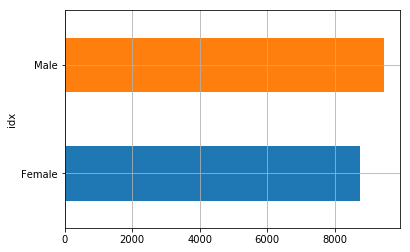

In [15]:
res['Purchase'].plot(kind='barh',grid=True)

- 여성의 경우 평균 8753 달라를 소비하는 반면, 남성의 경우 평균 9458 달러를 소비함

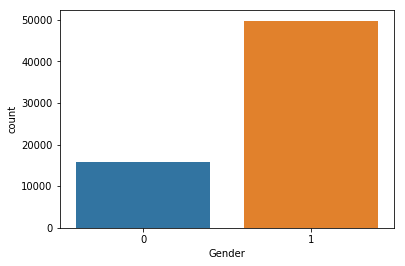

In [35]:
sns.countplot(data['Gender'])

- 남성과 여성의 제품 구매 갯수를 비교해보면 남성이 월등히 높은 것을 볼 수 있음
- 그 이유는 현재 데이터로는 해석 불가능

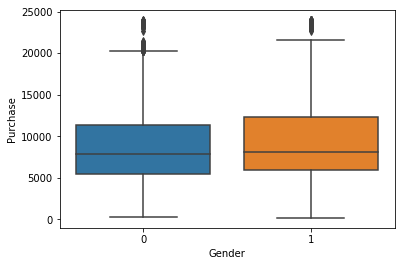

In [16]:
sns.boxplot('Gender','Purchase',data = data)

- 자세히 보기 위해 box plot을 그려보면 근소하게 남성의 소비가 높은 것을 알 수 있음

### 2. 연령대 별 구매 금액 분석

In [17]:
age = ['0-17','18-25','26-35','36-45','46-50','51-55','55+']
res = data[['Age','Purchase']].groupby('Age').mean()
res['idx'] = age
res = res.set_index('idx')
res

,Purchase
idx,
0-17,9121.950801
18-25,9155.310029
26-35,9283.579179
36-45,9334.312312
46-50,9182.749032
51-55,9670.468737
55+,9389.606321


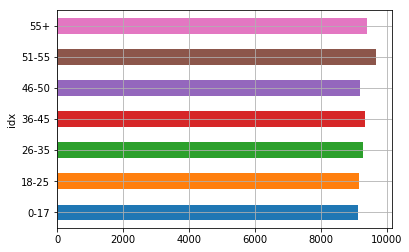

In [18]:
res['Purchase'].plot(kind='barh',grid=True)

- 근소하게 51~ 55세가 약 평균 9670 달러 소비하여 높으나 가장 적은 0-17세 9121 소비와 크게 차이가 없음

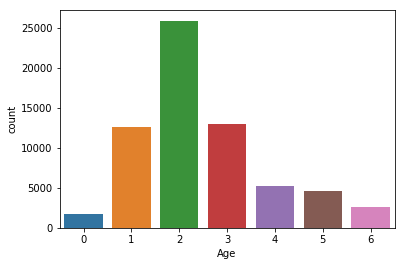

In [52]:
sns.countplot(data['Age'])

- 물품 구매 량을 봤을 때 26세 ~ 35세가 가장 높게 나타남

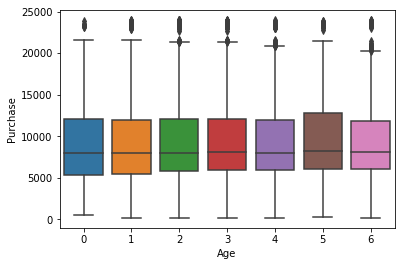

In [19]:
sns.boxplot('Age','Purchase', data = data)
plt.show()


- box plot으로 보았을때, outlier 를 제외하고 평균이 가장 높은 51-55세와 가장 적은 0-17세의 최고 구매 금액은 유사한 것을 볼 수 있음
- 따라서 어느 연령대가 Black Friday에 영향을 미친다고 보기는 어려움

### 3. 도시 별 구매 금액 분석

In [20]:
city = ['A','B','C']
res = data[['City_Category','Purchase']].groupby('City_Category').mean()
res['idx'] = city
res = res.set_index('idx')
res

,Purchase
idx,
A,8886.178268
B,9186.528223
C,9786.738839


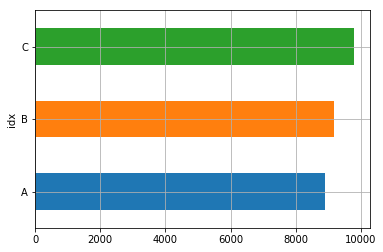

In [21]:
res['Purchase'].plot(kind='barh',grid=True)

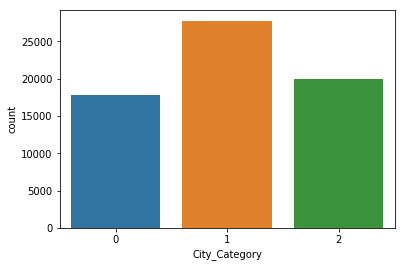

In [53]:
sns.countplot(data['City_Category'])

- 구매 량은 B 도시의 구매 량이 높은 것으로 나타남

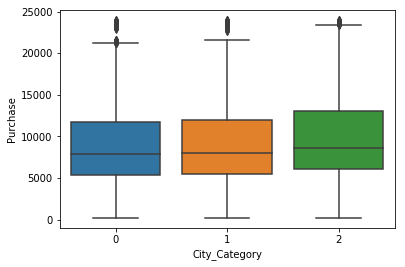

In [22]:
sns.boxplot('City_Category','Purchase', data = data)
plt.show()

- 도시 별 구매 금액의 차이는 C 도시가 A, B 도시에 비해 돈을 더 쓰는 경향이 있으며, 도시의 정보가 있으면 조금 더 분석이 가능하겠지만 유추해보면 C 도시가 A,B 도시 보다 발달된 도시임을 유추할 수 있음

### 4. 기혼 여부에 따른 구매 금액 분석

In [24]:
res = data[['Marital_Status','Purchase']].groupby('Marital_Status').mean()
res

,Purchase
Marital_Status,
0,9283.303662
1,9295.572546


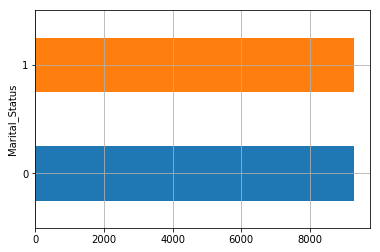

In [25]:
res['Purchase'].plot(kind='barh',grid=True)

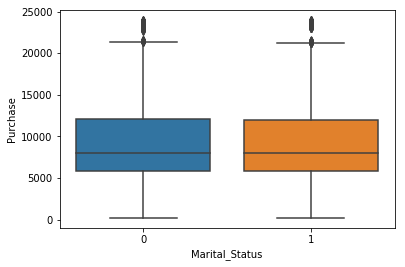

In [27]:
sns.boxplot('Marital_Status','Purchase',data = data)

- 기혼, 미혼에 따라 구매 금액은 거의 유사함으로 영향을 미치지 않음

### 5. 직업에 따른 구매 분석

In [33]:
res = data[['Occupation','Purchase']].groupby('Occupation').mean()
res

,Purchase
Occupation,
0,9116.714014
1,8890.086511
2,9003.718456
3,9418.600276
4,9262.996536
5,9431.047757
6,9498.614156
7,9515.020688
8,9835.755000


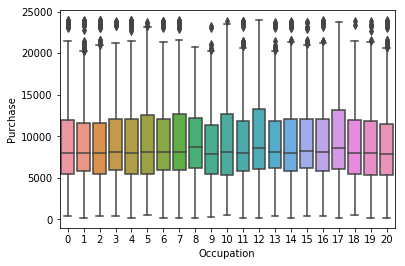

In [31]:
sns.boxplot('Occupation','Purchase',data = data)

- 직업 군에 따라 구매 금액은 차이가 있으며 8,10,12,17 직업군이 높은 구매 금액을 보임

## 구매 금액과 요인 별 상관관계 분석

In [22]:
corrmat = data.corr()
corrmat['Purchase']

Gender                0.060865
Age                   0.018387
Occupation            0.013673
City_Category         0.069435
Marital_Status        0.001215
Product_Category_1   -0.318925
Product_Category_2    0.043247
Product_Category_3    0.287763
Purchase              1.000000
Name: Purchase, dtype: float64

- 대부분의 요인들은 구매 금액과 대략 0.01~0.06의 약한 상관관계를 가지고 있음
- 이 뜻은 대부분 구매 금액과 영향을 미치지 못하는 것으로 나타남
- 그 중 도시와 성별이 약 0.06 으로 높게 나타남
- Product_Category1과 Product_Category3은 높은 상관 관계를 지니고 있는 것으로 나오는데 1은 음의 상관관계, 3은 양의 상관관계를 보이고 있음
- 하지만 구매 품목의 카테고리의 변화와 금액의 변화는 큰 의미있는 데이터는 아님
- 예를 들어, Product_Category_1의 값이 낮다고 해서 금액이 높아지는 것은 label을 낮게 받은 카테고리의 가격이 높은 품목일 뿐
- 또한, Product_Category_3의 값이 낮다고 해서 금액이 낮아지는 것은 label을 낮게 받은 카테고리의 가격이 낮은 품목
- 쉽게 설명하여, TV 카테고리가 15, 운동화 카테고리가 1 이라고 했을 때 각 카테고리에 부여받은 숫자가 의미 있는 것이 아니라 그 고유의 "TV" 혹은 "운동화"가 의미가 있는 것일 뿐. (TV가 운동화보다 비싼건 당연한 이야기이니 ..)